In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn import mixture
import pandas as pd
import glob
from pyclustertend import ivat
from sklearn.preprocessing import scale
from pyclustertend import hopkins
from sklearn.decomposition import PCA
from sklearn.cluster import *
from mlxtend.preprocessing import standardize
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import metrics

In [ ]:
'''
path = r'C:\Users\asady\OneDrive - polymtl.ca\Data\Resource\Material\Raw Data\Weather\Hourly_YUL\2019'

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

frame.to_csv("C:/Users/asady/OneDrive - polymtl.ca/Data/Resource/Material/Raw Data/Weather/Hourly_YUL/2019/Total.csv")
'''

In [28]:
df = pd.read_csv('C:/Users/asady/OneDrive - polymtl.ca/Data/Resource/Material/Raw Data/Weather/Hourly_YUL/2019/Total.csv', index_col=False)
del df['Unnamed: 0']
df.isna().sum()

Temp (°C)              23
Precip. Amount (mm)    23
Wind Spd (km/h)        50
dtype: int64

In [29]:
df.dropna(inplace=True)
df.isna().sum()

Temp (°C)              0
Precip. Amount (mm)    0
Wind Spd (km/h)        0
dtype: int64

In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp (°C),8710.0,7.045660,12.257993,-22.8,-2.3,7.8,17.1,32.8
Precip. Amount (mm),8710.0,0.123754,0.702272,0.0,0.0,0.0,0.0,28.4
Wind Spd (km/h),8710.0,14.080138,7.662205,0.0,8.0,13.0,18.0,59.0


In [ ]:
df.hist(layout = (3,3), grid=False,
       figsize=(10, 6),
       bins=30)
plt.tight_layout()

In [ ]:
hopkins(df,150)

In [ ]:
df.skew()

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
plotScatterMatrix(df, 50, 20)

In [13]:
df['Temp (°C)'].sort_values(ascending=True)

443    -22.8
445    -22.7
446    -22.5
450    -22.4
447    -22.4
        ... 
4436    31.9
4437    32.1
4438    32.1
4819    32.2
4820    32.8
Name: Temp (°C), Length: 8710, dtype: float64

In [14]:
df.loc[:, "Temp (°C)"] = df["Temp (°C)"].apply(lambda x: x + 25)

In [16]:
df['Temp (°C)'].sort_values(ascending=True)

443      2.2
445      2.3
446      2.5
450      2.6
447      2.6
        ... 
4436    56.9
4437    57.1
4438    57.1
4819    57.2
4820    57.8
Name: Temp (°C), Length: 8710, dtype: float64

In [37]:
scaler = MinMaxScaler()
dfmm = scaler.fit_transform(df)
dfss = StandardScaler().fit_transform(df)
dfmm1 = dfmm.copy()
dfss1 = dfss.copy()

In [40]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(dfmm1)

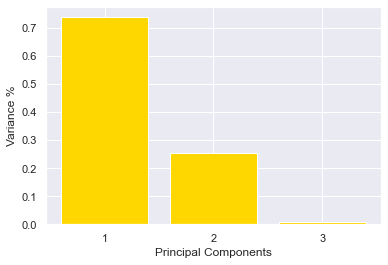

In [41]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

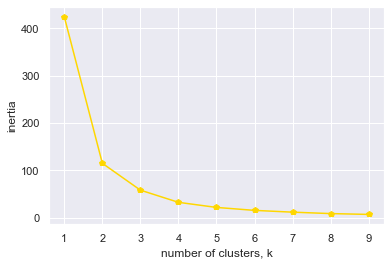

In [43]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:1])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks()
plt.show()

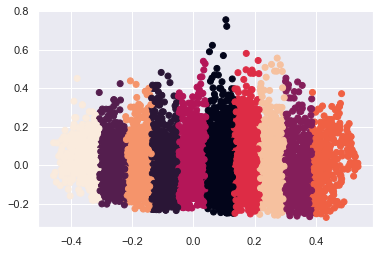

In [57]:
model = KMeans(n_clusters=10)
model.fit(PCA_components.iloc[:,:1])

labels = model.predict(PCA_components.iloc[:,:1])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [58]:
metrics.silhouette_score(PCA_components.iloc[:,:1], labels)

0.5272566789334244

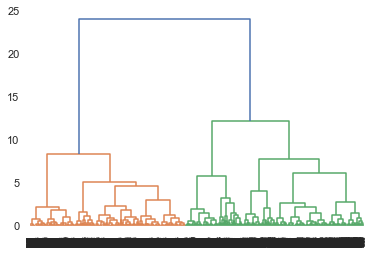

In [61]:
mergingsw = linkage(dfmm, method="ward", metric='euclidean')
dendrogram(mergingsw)
plt.show()

In [66]:
model_ward = AgglomerativeClustering(n_clusters=10, linkage='ward', affinity='euclidean')
clusters_ward = model_ward.fit_predict(mergingsw)

In [67]:
metrics.silhouette_score(mergingsw, clusters_ward) 

0.4609804710472581

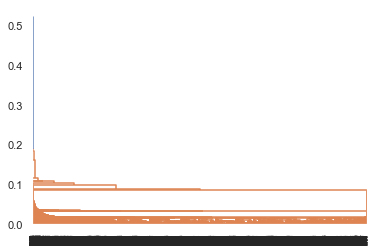

In [69]:
mergingss = linkage(dfmm, method="single", metric='euclidean')
dendrogram(mergingss)
plt.show()

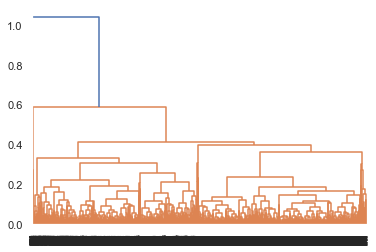

In [70]:
mergingsa = linkage(dfmm, method="average", metric='euclidean')
dendrogram(mergingsa)
plt.show()

In [107]:
model_average = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='euclidean')
clusters_average = model_average.fit_predict(mergingsa)

In [108]:
metrics.silhouette_score(mergingsa, clusters_average) 

0.39053917730270804

C:\Users\asady\.conda\envs\Gower\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

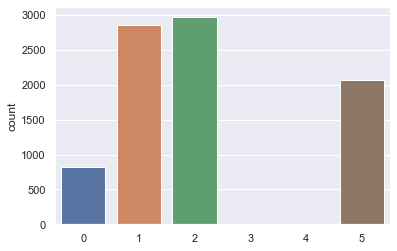

In [109]:
sns.countplot(clusters_average)

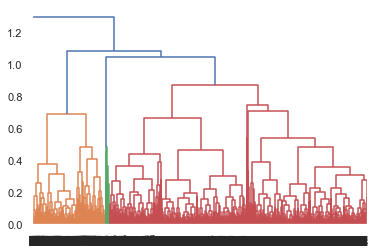

In [73]:
mergingsc = linkage(dfmm, method="complete", metric='euclidean')
dendrogram(mergingsc)
plt.show()

In [116]:
model_complete = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean')
clusters_complete_dh_merged = model_complete.fit_predict(mergingsc)

In [117]:
metrics.silhouette_score(mergingsc, clusters_complete_dh_merged) 

0.43458768723865676

C:\Users\asady\.conda\envs\Gower\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

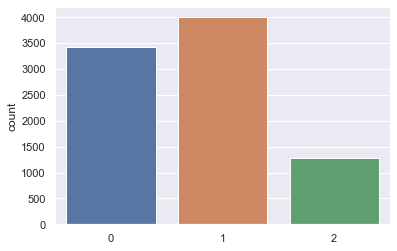

In [118]:
sns.countplot(clusters_complete_dh_merged)